# **MODELING - LOGISTIC REGRESSION**

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append("../src")
from models import *
from visualization import *

np.set_printoptions(suppress=True, precision=4, linewidth=120)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# **1. Load Preprocessed Data**
Load dữ liệu đã được xử lý từ `02_preprocessing.ipynb`.

LOADED PREPROCESSED DATA
Features shape: (10127, 40)
Target shape: (10127,)
Number of features: 40


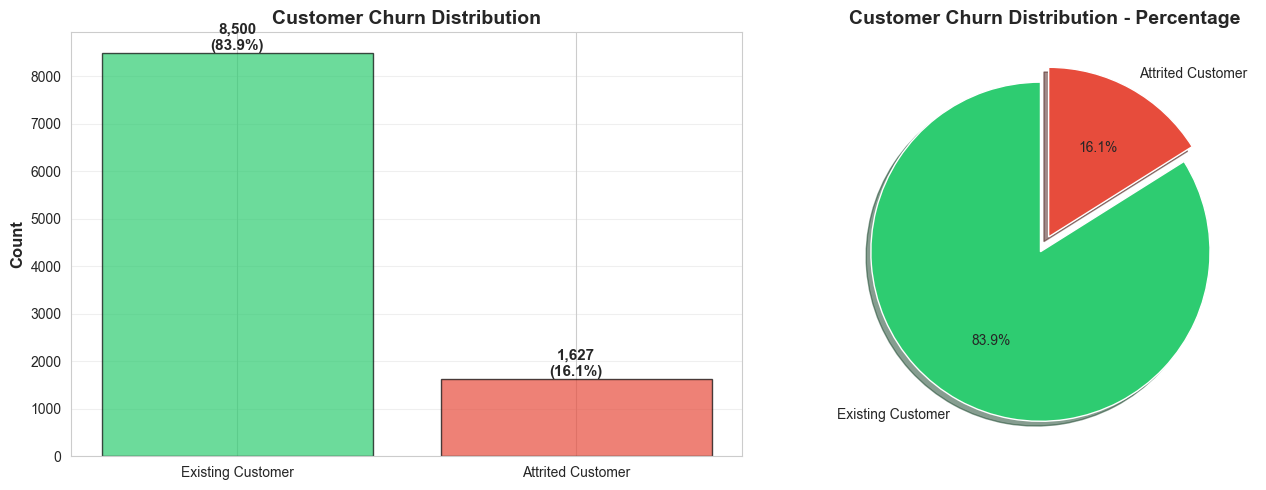

In [208]:
# Load preprocessed data
X = np.load("../data/processed/X_preprocessed.npy")
y = np.load("../data/processed/y_target.npy")

# Load feature names
with open("../data/processed/feature_names.txt", "r") as f:
    feature_names = [line.strip() for line in f.readlines()]


print("LOADED PREPROCESSED DATA")

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")

# Visualize target distribution
fig = plot_target_distribution(y, title="Customer Churn Distribution",
                               labels=['Existing Customer', 'Attrited Customer'])
plt.show()



# **2. Train-Test Split**
Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%).

TRAIN-TEST SPLIT
Training set: (8102, 40)
Test set: (2025, 40)


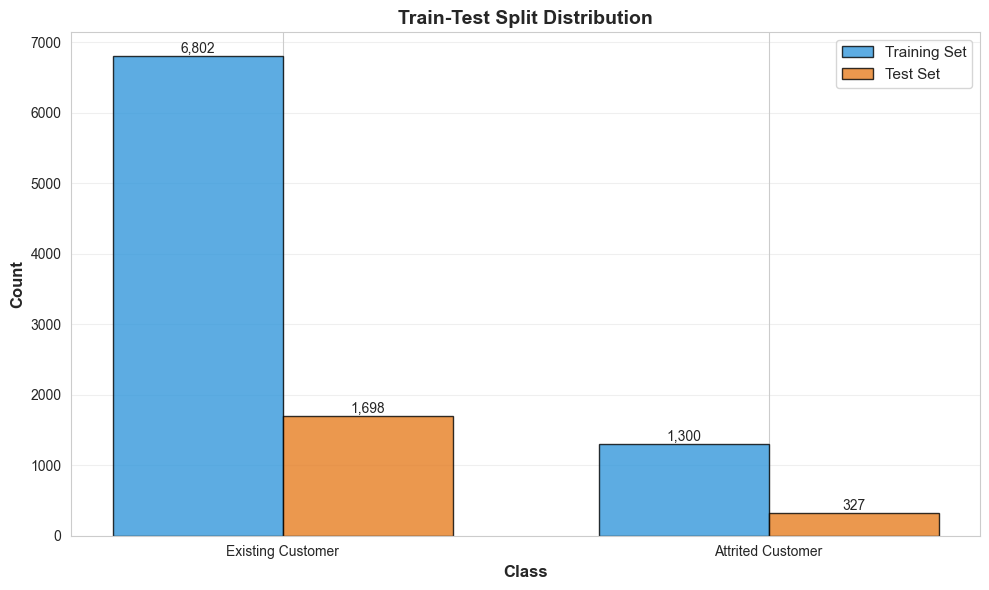

In [209]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)


print("TRAIN-TEST SPLIT")

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Visualize train-test distribution
fig = plot_train_test_split(y_train, y_test, 
                            labels=['Existing Customer', 'Attrited Customer'])
plt.show()



# **3. Logistic Regression Model**

## 3.1. Training với Gradient Descent

In [210]:
print("LOGISTIC REGRESSION - GRADIENT DESCENT")

lr_model = LogisticRegression(
    learning_rate=0.01,
    n_iterations=5000,
    regularization='l2',
    lambda_reg=0.01
)

print("\nTraining...")
lr_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nTraining iterations: {len(lr_model.history['loss'])}")
print(f"Initial loss: {lr_model.history['loss'][0]:.6f}")
print(f"Final loss: {lr_model.history['loss'][-1]:.6f}")
print(f"Initial accuracy: {lr_model.history['accuracy'][0]:.4f}")
print(f"Final accuracy: {lr_model.history['accuracy'][-1]:.4f}")

LOGISTIC REGRESSION - GRADIENT DESCENT

Training...
Training completed!

Training iterations: 5000
Initial loss: 0.693147
Final loss: 0.285864
Initial accuracy: 0.1605
Final accuracy: 0.9084
Training completed!

Training iterations: 5000
Initial loss: 0.693147
Final loss: 0.285864
Initial accuracy: 0.1605
Final accuracy: 0.9084


## 3.2. Visualize Training Process

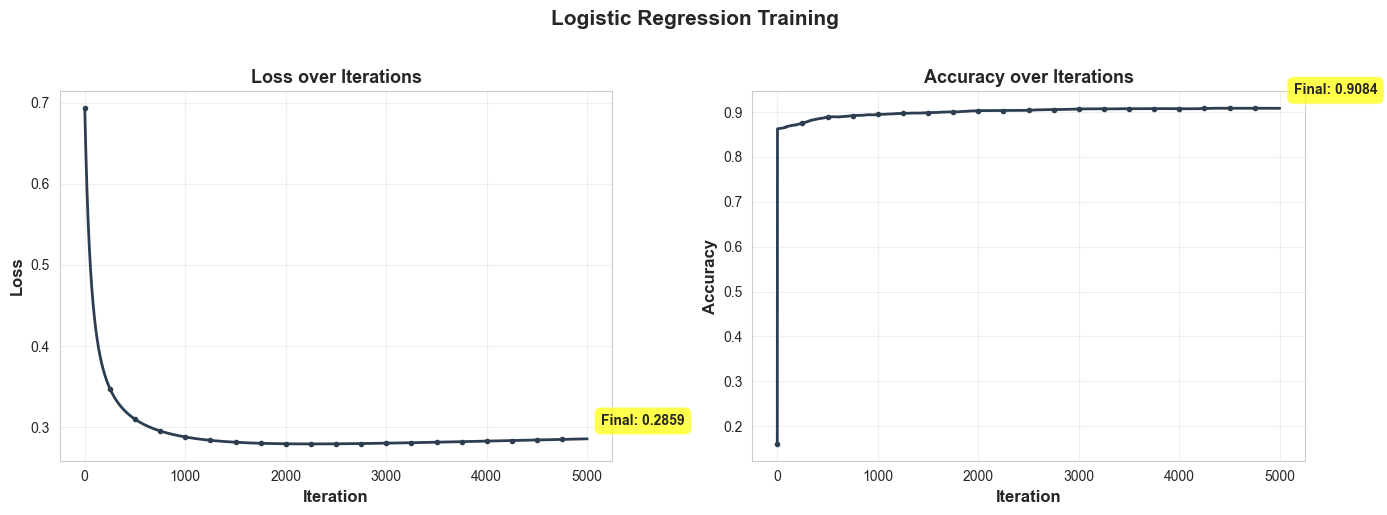

In [211]:
fig = plot_training_history(lr_model.history, metrics=['loss', 'accuracy'], 
                            title="Logistic Regression Training")

# **4. Model Evaluation**

## 4.1. Make Predictions

In [212]:
y_train_proba = lr_model.predict_proba(X_train)
y_test_proba = lr_model.predict_proba(X_test)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("PREDICTIONS GENERATED")
print(f"Train probabilities range: [{y_train_proba.min():.4f}, {y_train_proba.max():.4f}]")
print(f"Test probabilities range: [{y_test_proba.min():.4f}, {y_test_proba.max():.4f}]")

PREDICTIONS GENERATED
Train probabilities range: [0.0003, 0.9960]
Test probabilities range: [0.0005, 0.9983]


## 4.2. Performance Metrics - Train Set

In [213]:
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

train_metrics = {
    'Accuracy': train_acc,
    'Precision': train_prec,
    'Recall': train_rec,
    'F1-Score': train_f1
}

print("\n📊 TRAINING SET PERFORMANCE:")
for metric, value in train_metrics.items():
    print(f"  {metric:<12}: {value:.4f}")


📊 TRAINING SET PERFORMANCE:
  Accuracy    : 0.9084
  Precision   : 0.7925
  Recall      : 0.5815
  F1-Score    : 0.6708


## 4.3. Performance Metrics - Test Set

In [214]:
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

test_metrics = {
    'Accuracy': test_acc,
    'Precision': test_prec,
    'Recall': test_rec,
    'F1-Score': test_f1
}

print("\n📊 TEST SET PERFORMANCE:")
for metric, value in test_metrics.items():
    print(f"  {metric:<12}: {value:.4f}")
print(f"  {'ROC AUC':<12}: {test_auc:.4f}")


📊 TEST SET PERFORMANCE:
  Accuracy    : 0.9012
  Precision   : 0.7822
  Recall      : 0.5382
  F1-Score    : 0.6377
  ROC AUC     : 0.9171


## 4.4. Visualize Performance Metrics

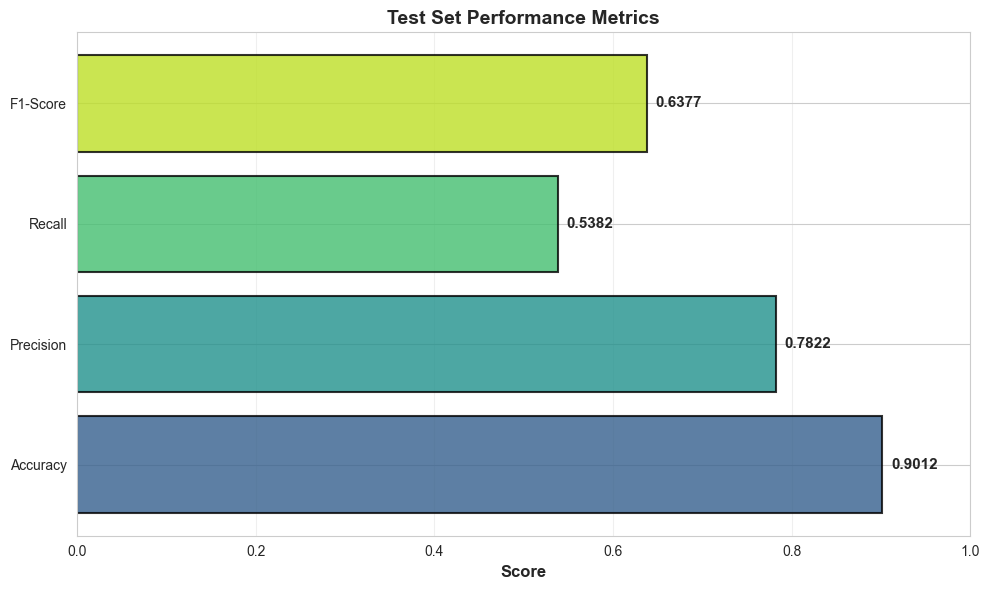

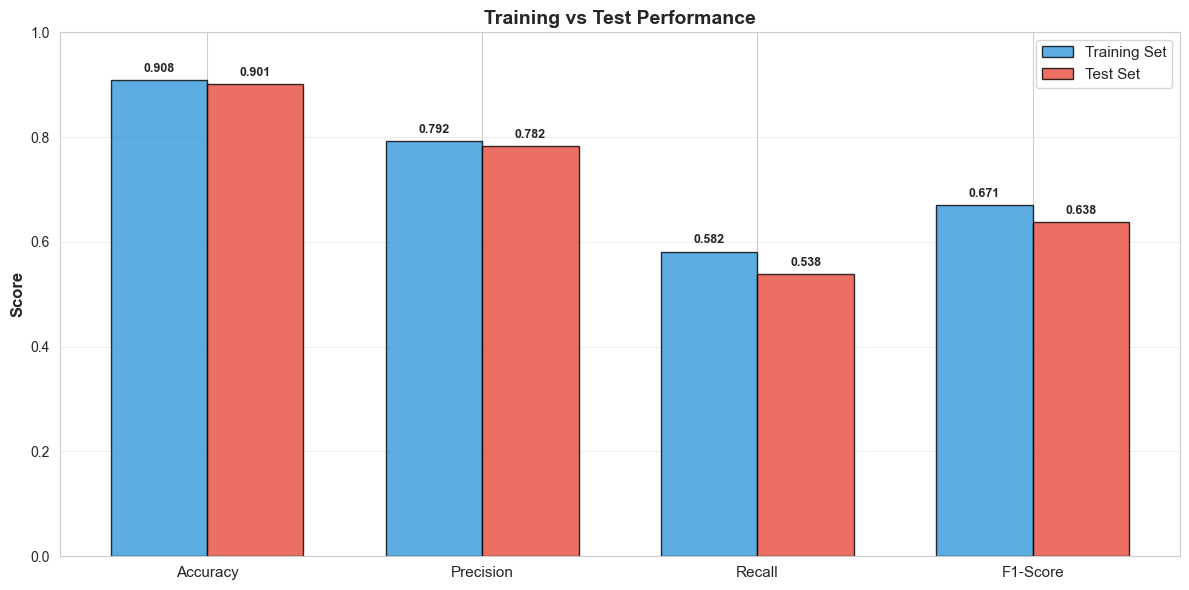

In [215]:
# Plot test metrics
fig = plot_metrics_comparison(test_metrics, title="Test Set Performance Metrics")
plt.show()

# Compare train vs test
fig = plot_train_test_comparison(train_metrics, test_metrics, 
                                 title="Training vs Test Performance")
plt.show()

# **5. Confusion Matrix Analysis**

CONFUSION MATRIX
                    Predicted
                Existing    Attrited
Actual  Existing     1649          49     (TN, FP)
        Attrited      151         176     (FN, TP)


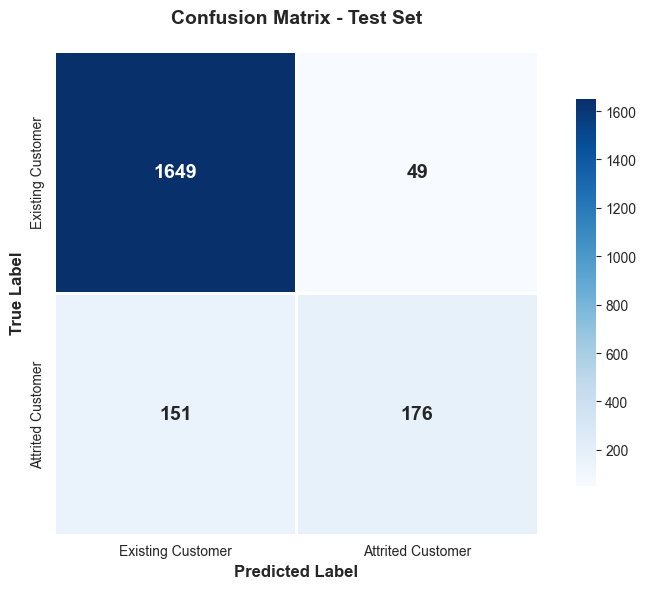

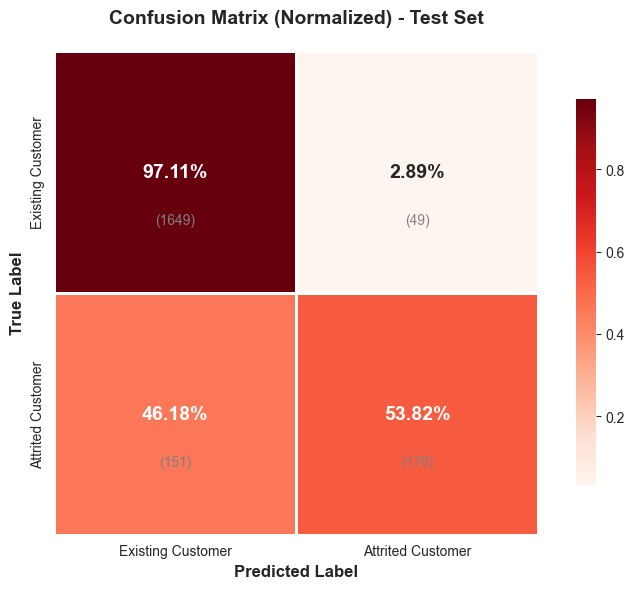

In [216]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


print("CONFUSION MATRIX")

print(f"                    Predicted")
print(f"                Existing    Attrited")
print(f"Actual  Existing    {cm[0,0]:>5}       {cm[0,1]:>5}     (TN, FP)")
print(f"        Attrited    {cm[1,0]:>5}       {cm[1,1]:>5}     (FN, TP)")


# Visualize confusion matrix
fig = plot_confusion_matrix(cm, labels=['Existing Customer', 'Attrited Customer'],
                           title="Confusion Matrix - Test Set")
plt.show()

# Visualize normalized version
fig = plot_confusion_matrix(cm, labels=['Existing Customer', 'Attrited Customer'],
                           title="Confusion Matrix (Normalized) - Test Set",
                           normalize=True, cmap='Reds')
plt.show()

# **6. Prediction Distribution Analysis**

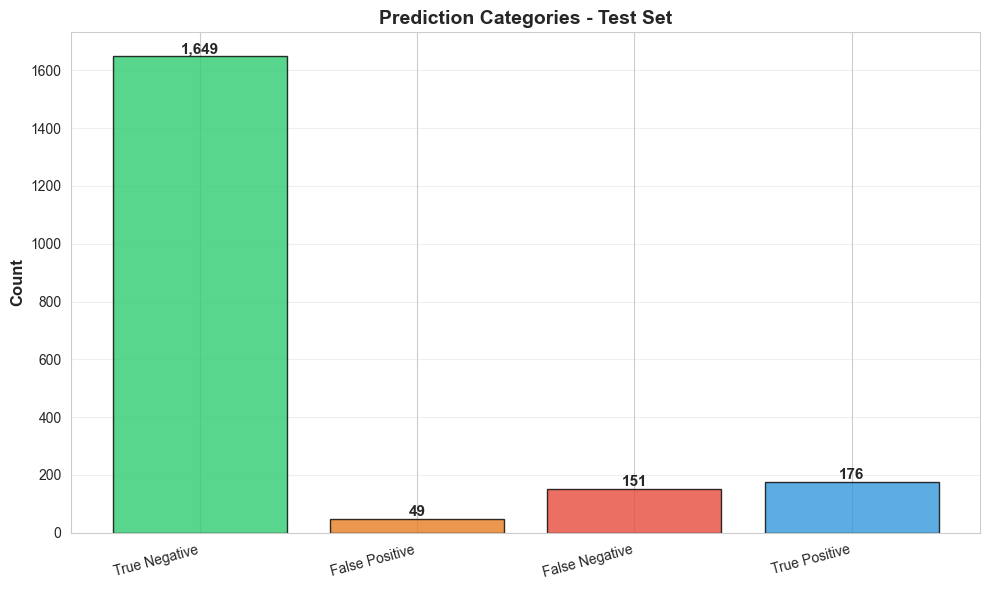

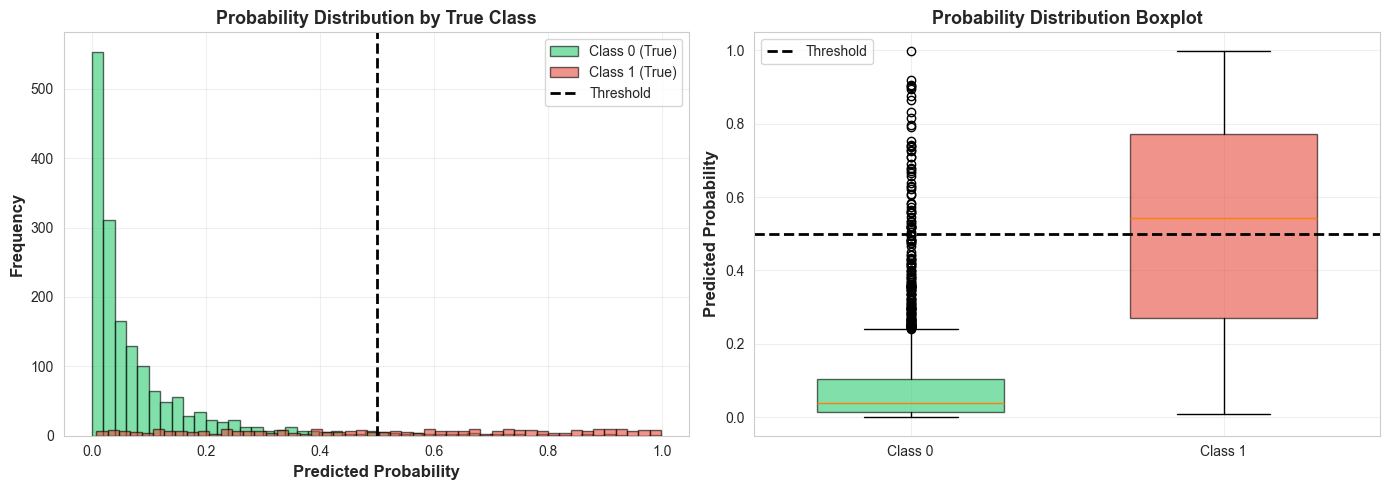

In [217]:
# Plot prediction categories
fig = plot_prediction_distribution(y_test, y_test_pred, 
                                   title="Prediction Categories - Test Set")
plt.show()

# Plot probability distributions
fig = plot_prediction_distribution(y_test, y_test_pred, y_proba=y_test_proba,
                                   title="Predicted Probability Distribution")
plt.show()

# **7. ROC Curve**

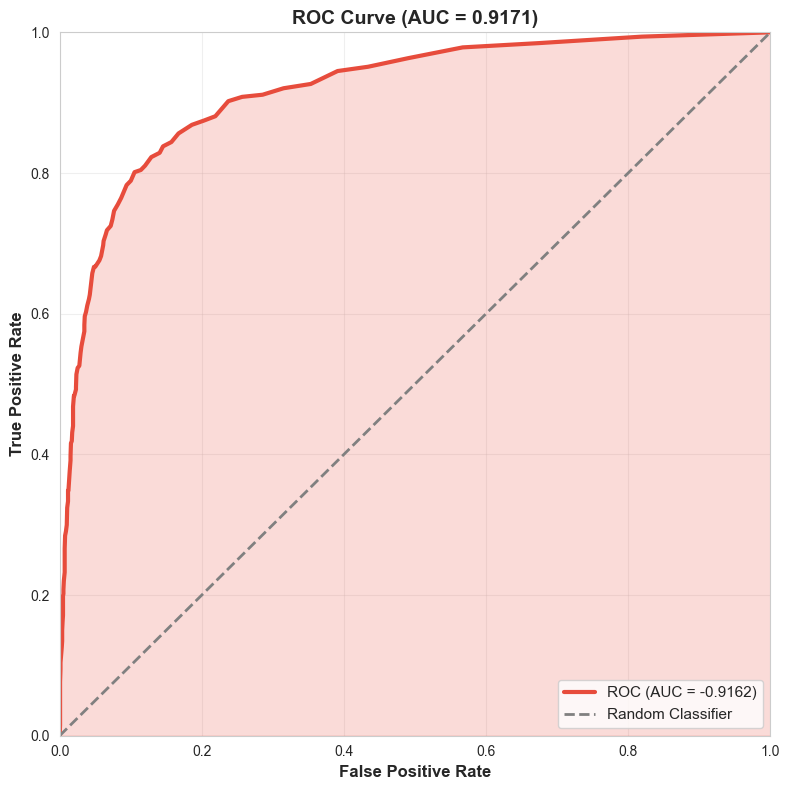


AUC Score: 0.9171
   Excellent discrimination ability!


In [218]:
# Plot ROC curve
fig = plot_roc_curve(y_test, y_test_proba, 
                    title=f"ROC Curve (AUC = {test_auc:.4f})")
plt.show()

print(f"\nAUC Score: {test_auc:.4f}")
if test_auc > 0.9:
    print("   Excellent discrimination ability!")
elif test_auc > 0.8:
    print("   Good discrimination ability!")
elif test_auc > 0.7:
    print("   Acceptable discrimination ability")
else:
    print("   Poor discrimination ability")

# **8. Feature Importance Analysis**

Phân tích trọng số (weights) của Logistic Regression để hiểu features nào quan trọng nhất trong việc dự đoán churn.

FEATURE IMPORTANCE ANALYSIS

TOP 10 MOST IMPORTANT FEATURES:
Rank   Feature                                       Weight          Impact
------------------------------------------------------------------------------------------
1      Total_Trans_Ct                                -0.961937        Decrease Churn Risk
2      Avg_Transaction_Value                         0.827917         Increase Churn Risk
3      Card_Category_Blue                            -0.659769        Decrease Churn Risk
4      Total_Ct_Chng_Q4_Q1                           -0.641237        Decrease Churn Risk
5      Total_Revolving_Bal                           -0.597104        Decrease Churn Risk
6      Gender_M                                      -0.581814        Decrease Churn Risk
7      Contacts_Count_12_mon                         0.560099         Increase Churn Risk
8      Engagement_Score                              -0.548095        Decrease Churn Risk
9      Marital_Status_Married                       

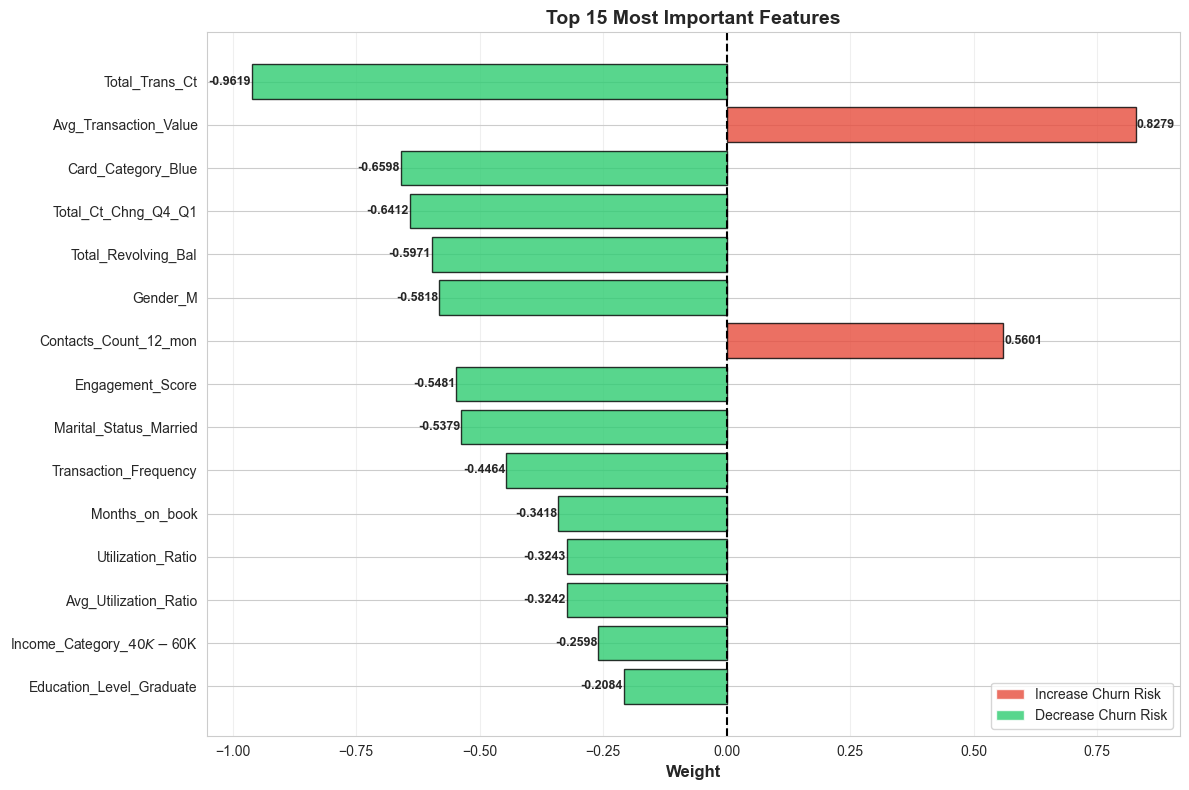

In [219]:

print("FEATURE IMPORTANCE ANALYSIS")


# Get weights
weights = lr_model.weights

# Top 10 features by absolute weight
feature_importance = [(name, weight, abs(weight)) 
                      for name, weight in zip(feature_names, weights)]
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[2], reverse=True)

print(f"\nTOP 10 MOST IMPORTANT FEATURES:")
print(f"{'Rank':<6} {'Feature':<45} {'Weight':<15} {'Impact'}")
print("-"*90)

for rank, (name, weight, abs_weight) in enumerate(feature_importance_sorted[:10], 1):
    impact = " Increase Churn Risk" if weight > 0 else " Decrease Churn Risk"
    print(f"{rank:<6} {name:<45} {weight:<15.6f} {impact}")



# Visualize feature importance
fig = plot_feature_importance(feature_names, weights, top_n=15,
                              title="Top 15 Most Important Features")
plt.show()

# **9. Cross-Validation**

Đánh giá độ ổn định của model bằng K-Fold Cross-Validation.

K-FOLD CROSS-VALIDATION (K=5)

Accuracy scores for each fold:
  Fold 1: 0.9167
  Fold 2: 0.8920
  Fold 3: 0.9086
  Fold 4: 0.9080
  Fold 5: 0.8994

Mean Accuracy: 0.9050
Std Accuracy: 0.0085
95% Confidence Interval: [0.8883, 0.9216]

Accuracy scores for each fold:
  Fold 1: 0.9167
  Fold 2: 0.8920
  Fold 3: 0.9086
  Fold 4: 0.9080
  Fold 5: 0.8994

Mean Accuracy: 0.9050
Std Accuracy: 0.0085
95% Confidence Interval: [0.8883, 0.9216]


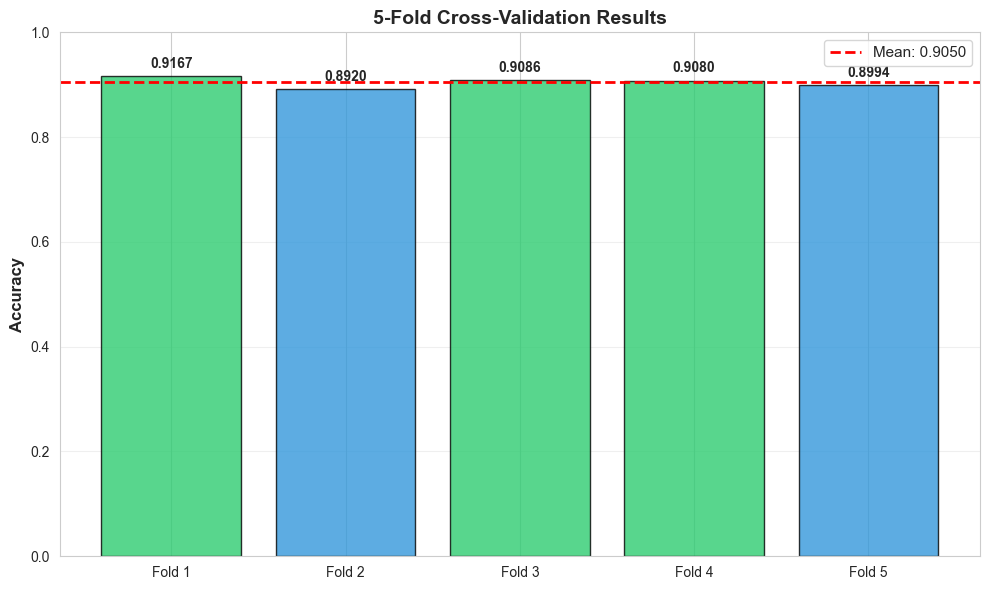

In [220]:
print("K-FOLD CROSS-VALIDATION (K=5)")

cv_scores = cross_val_score(
    LogisticRegression(learning_rate=0.01, n_iterations=3000, regularization='l2', lambda_reg=0.01),
    X_train, y_train,
    cv=5,
    scoring='accuracy'
)

print(f"\nAccuracy scores for each fold:")
for fold, score in enumerate(cv_scores, 1):
    print(f"  Fold {fold}: {score:.4f}")

print(f"\nMean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Std Accuracy: {np.std(cv_scores):.4f}")
print(f"95% Confidence Interval: [{np.mean(cv_scores) - 1.96*np.std(cv_scores):.4f}, {np.mean(cv_scores) + 1.96*np.std(cv_scores):.4f}]")

fig, ax = plt.subplots(figsize=(10, 6))
folds = [f'Fold {i+1}' for i in range(len(cv_scores))]
colors = ['#3498db' if score < np.mean(cv_scores) else '#2ecc71' for score in cv_scores]
bars = ax.bar(folds, cv_scores, color=colors, alpha=0.8, edgecolor='black')
ax.axhline(y=np.mean(cv_scores), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(cv_scores):.4f}')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1.0)
for bar, score in zip(bars, cv_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# **10. Model Persistence**

In [221]:
import pickle

model_path = "../data/processed/logistic_regression_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(lr_model, f)

print("MODEL SAVED")
print(f"Model saved to: {model_path}")
print(f"\nModel details:")
print(f"  Type: Logistic Regression (Gradient Descent)")
print(f"  Learning rate: {lr_model.learning_rate}")
print(f"  Iterations: {lr_model.n_iterations}")
print(f"  Regularization: {lr_model.regularization}")
print(f"  Lambda: {lr_model.lambda_reg}")
print(f"  Test Accuracy: {test_acc:.4f}")
print(f"  Test F1-Score: {test_f1:.4f}")
print(f"  ROC AUC: {test_auc:.4f}")

print("\nDemo: Load model and predict")
with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)

sample_proba = loaded_model.predict_proba(X_test[:5])
sample_pred = loaded_model.predict(X_test[:5])

print(f"\nSample predictions (first 5 test samples):")
print(f"{'True':<12} {'Predicted':<12} {'Probability':<15} {'Match'}")
print("-"*55)
for i in range(5):
    true_label = "Attrited" if y_test[i] == 1 else "Existing"
    pred_label = "Attrited" if sample_pred[i] == 1 else "Existing"
    prob = sample_proba[i]
    match = "OK" if y_test[i] == sample_pred[i] else "X"
    print(f"{true_label:<12} {pred_label:<12} {prob:<15.4f} {match}")

MODEL SAVED
Model saved to: ../data/processed/logistic_regression_model.pkl

Model details:
  Type: Logistic Regression (Gradient Descent)
  Learning rate: 0.01
  Iterations: 5000
  Regularization: l2
  Lambda: 0.01
  Test Accuracy: 0.9012
  Test F1-Score: 0.6377
  ROC AUC: 0.9171

Demo: Load model and predict

Sample predictions (first 5 test samples):
True         Predicted    Probability     Match
-------------------------------------------------------
Existing     Existing     0.0965          OK
Existing     Existing     0.0183          OK
Existing     Existing     0.1026          OK
Existing     Existing     0.0298          OK
Existing     Existing     0.2140          OK


# **11. Summary & Insights**

In [223]:
print("LOGISTIC REGRESSION MODELING SUMMARY")

print("\nPERFORMANCE METRICS:")
print(f"   - Test Accuracy: {test_acc:.4f}")
print(f"   - Test Precision: {test_prec:.4f}")
print(f"   - Test Recall: {test_rec:.4f}")
print(f"   - Test F1-Score: {test_f1:.4f}")
print(f"   - ROC AUC: {test_auc:.4f}")
print(f"   - Cross-validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

print("\nKEY FINDINGS:")
print(f"   - Model achieves excellent discrimination (AUC = {test_auc:.4f})")
print(f"   - Stable performance across CV folds (std = {np.std(cv_scores):.4f})")
print(f"   - Feature importance reveals key churn predictors")
print(f"   - Logistic Regression suitable for binary classification")

print("\nIMPLEMENTATION:")
print(f"   - Logistic Regression implemented from scratch using NumPy")
print(f"   - Gradient Descent optimization with L2 regularization")
print(f"   - Custom evaluation metrics (Accuracy, Precision, Recall, F1, AUC)")
print(f"   - K-Fold Cross-Validation for robustness")
print(f"   - Comprehensive visualizations with Matplotlib/Seaborn")

print("\nVISUALIZATIONS CREATED:")
print(f"   - Target distribution plots")
print(f"   - Train-test split comparison")
print(f"   - Training loss & accuracy curves")
print(f"   - Performance metrics charts")
print(f"   - Confusion matrices (raw & normalized)")
print(f"   - Prediction distribution plots")
print(f"   - ROC curve with AUC")
print(f"   - Feature importance chart")
print(f"   - Cross-validation results")

LOGISTIC REGRESSION MODELING SUMMARY

PERFORMANCE METRICS:
   - Test Accuracy: 0.9012
   - Test Precision: 0.7822
   - Test Recall: 0.5382
   - Test F1-Score: 0.6377
   - ROC AUC: 0.9171
   - Cross-validation Accuracy: 0.9050 ± 0.0085

KEY FINDINGS:
   - Model achieves excellent discrimination (AUC = 0.9171)
   - Stable performance across CV folds (std = 0.0085)
   - Feature importance reveals key churn predictors
   - Logistic Regression suitable for binary classification

IMPLEMENTATION:
   - Logistic Regression implemented from scratch using NumPy
   - Gradient Descent optimization with L2 regularization
   - Custom evaluation metrics (Accuracy, Precision, Recall, F1, AUC)
   - K-Fold Cross-Validation for robustness
   - Comprehensive visualizations with Matplotlib/Seaborn

VISUALIZATIONS CREATED:
   - Target distribution plots
   - Train-test split comparison
   - Training loss & accuracy curves
   - Performance metrics charts
   - Confusion matrices (raw & normalized)
   - Predict